In [57]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import math
legend_properties = {'weight':'bold'}

In [58]:
data_folder = r"E:\data\dao-0310\V4_4\TypicalRun"
dao_performance_file = data_folder + r"\dao_typical_run"
consensus_performance_file = data_folder + r"\dao_consensus_typical_run"
hierarchy_performance_file = data_folder + r"\hierarchy_typical_run"
autonomy_performance_file = data_folder + r"\autonomy_typical_run"

with open(dao_performance_file, 'rb') as infile:
    dao_performance = pickle.load(infile)
with open(consensus_performance_file, 'rb') as infile:
    consensus_performance = pickle.load(infile)
with open(hierarchy_performance_file, 'rb') as infile:
    hierarchy_performance = pickle.load(infile)
with open(autonomy_performance_file, 'rb') as infile:
    autonomy_performance = pickle.load(infile)

In [59]:
# Define more colors
# NUS two colors
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"

In [60]:
print(np.array(dao_performance).shape)

(500, 1225)


In [61]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
for fig_index, index in enumerate(range(0, 10)):
    # Generate some random data
    data = np.array(dao_performance[index])  # 350
    # Reshape the data into a 10x10 grid
    reshape_x = 35
    reshape_y = 35
    data = data.reshape((reshape_x, reshape_y))
    # Create a denser grid for interpolation
    xi = np.linspace(0, 9, data.shape[0])
    yi = np.linspace(0, 9, data.shape[0])
    xi, yi = np.meshgrid(xi, yi)

    # Interpolate the data onto the denser grid
    zi = griddata((np.arange(reshape_x).repeat(reshape_y), np.tile(np.arange(reshape_x), reshape_y)), data.flatten(), (xi, yi), method='cubic')
    # Set up the figure and axes
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the 3D surface
    ax.plot_surface(xi, yi, zi, cmap='viridis')

    # Set the axis labels
    ax.set_zlabel('Performance')
    ax.set_xticks([])
    ax.set_yticks([])

    # Set the z-axis limits
    ax.set_zlim(0.1, 0.8)

    # Show the plot
    plt.grid(visible=False)
    plt.savefig(data_folder + r"\Typical_run_T{0}.png".format(index), transparent=True, dpi=1000, bbox_inches='tight')
    # plt.show()
    plt.close()  # not showing the figure in line


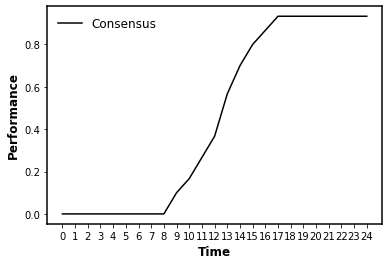

<Figure size 432x288 with 0 Axes>

In [62]:
# Test the formation timing of consensus
x = range(25)
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, consensus_performance[0:25], "k-", label="Consensus")
plt.xlabel('Time', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\Consensus_typical_run.png", transparent=True, dpi=200)
plt.show()
plt.clf()

In [63]:
# Select figures and calculate the ruggedness
import numpy as np
from scipy.signal import convolve2d
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
# Generate some random data
for index in range(0, 51):
    data = np.array(dao_performance[index])  # 350
    # Reshape the data into a 10x10 grid
    reshape_x = 35
    reshape_y = 35
    data = data.reshape((reshape_x, reshape_y))
    # Create a denser grid for interpolation
    xi = np.linspace(0, 9, data.shape[0])
    yi = np.linspace(0, 9, data.shape[0])
    xi, yi = np.meshgrid(xi, yi)

    # Interpolate the data onto the denser grid
    zi = griddata((np.arange(reshape_x).repeat(reshape_y), np.tile(np.arange(reshape_x), reshape_y)), data.flatten(), (xi, yi), method='cubic')
    # print(zi.shape)  # zi is the original data
    # Set up the figure and axes
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the 3D surface
    ax.plot_surface(xi, yi, zi, cmap='viridis')

    # calculate the ruggedness of the interpolated surface
    laplacian = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    ruggedness = np.abs(convolve2d(zi, laplacian, mode='valid')).sum()
    # add the ruggedness value to the figure
    ax.text2D(0.25, 0.2, f"Ruggedness: {ruggedness:.2f}", transform=ax.transAxes)

    # Set the axis labels
    ax.set_zlabel('Performance')
    ax.set_xticks([])
    ax.set_yticks([])

    # Set the z-axis limits
    ax.set_zlim(0.1, 0.8)

    # Show the plot
    plt.grid(visible=False)
    plt.savefig(data_folder + r"\Ruggedness_T{0}.png".format(index), transparent=True, dpi=200, bbox_inches='tight')
    # plt.show()
    plt.close()  # not showing the figure in line


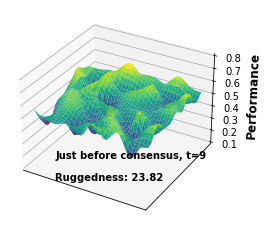

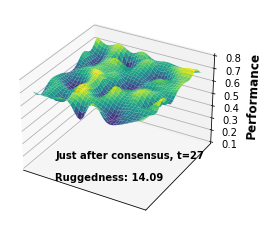

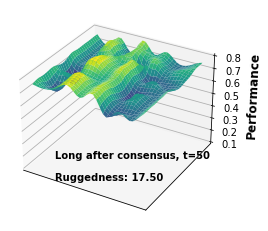

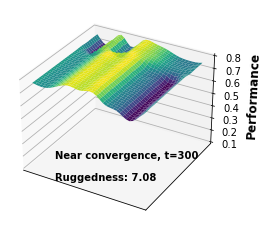

In [68]:
# Select figures and calculate the ruggedness
import numpy as np
from scipy.signal import convolve2d
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
# Generate some random data
# 9: at consensus, 27: 10 steps after consensus; t=50
for index in [9, 27, 50, 300]:
    data = np.array(dao_performance[index])  # 350
    # Reshape the data into a 10x10 grid
    reshape_x = 35
    reshape_y = 35
    data = data.reshape((reshape_x, reshape_y))
    # Create a denser grid for interpolation
    xi = np.linspace(0, 9, data.shape[0])
    yi = np.linspace(0, 9, data.shape[0])
    xi, yi = np.meshgrid(xi, yi)

    # Interpolate the data onto the denser grid
    zi = griddata((np.arange(reshape_x).repeat(reshape_y), np.tile(np.arange(reshape_x), reshape_y)), data.flatten(), (xi, yi), method='cubic')
    # print(zi.shape)  # zi is the original data
    # Set up the figure and axes
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the 3D surface
    ax.plot_surface(xi, yi, zi, cmap='viridis')

    # calculate the ruggedness of the interpolated surface
    laplacian = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    ruggedness = np.abs(convolve2d(zi, laplacian, mode='valid')).sum()
    # add the ruggedness value to the figure
    ax.text2D(0.22, 0.2, f"Ruggedness: {ruggedness:.2f}", transform=ax.transAxes, fontweight='bold')
    if index <=9:
        ax.text2D(0.22, 0.3, "Just before consensus, t={0}".format(index), transform=ax.transAxes, fontweight='bold')
    elif (index >= 17) and (index <= 30):
        ax.text2D(0.22, 0.3, "Just after consensus, t={0}".format(index), transform=ax.transAxes, fontweight='bold')
    elif (index >= 40) and (index <= 200):
        ax.text2D(0.22, 0.3, "Long after consensus, t={0}".format(index), transform=ax.transAxes, fontweight='bold')
    elif index >200:
        ax.text2D(0.22, 0.3, "Near convergence, t={0}".format(index), transform=ax.transAxes, fontweight='bold')
    # Set the axis labels
    ax.set_zlabel('Performance', fontweight='bold', fontsize=12)
    ax.set_xticks([])
    ax.set_yticks([])
    # Hide the x-axis and y-axis by setting their limits to None
    ax.xaxis.pane.set_edgecolor('white')
    ax.yaxis.pane.set_edgecolor('white')
    # Set the z-axis limits
    ax.set_zlim(0.1, 0.8)

    # Show the plot
    plt.grid(visible=False)
    plt.savefig(data_folder + r"\results\Ruggedness_T{0}.png".format(index), transparent=True, dpi=400, bbox_inches='tight')
    plt.show()
    # plt.close()  # not showing the figure in line
